In [2]:
import sklearn.metrics as metrics
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold
from sklearn import preprocessing
from evaluacion_funciones import *

In [3]:
# Carga de datos.
datos = load_iris()
X = datos.data[:,2:] # Utilizamos solo 2 atributos.
y = datos.target
print(np.shape(X))

(150, 2)


In [4]:
display(datos)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
# Métricas de evaluación.
metricas = {
  'ACC':    metrics.accuracy_score,
  'PREC':   lambda y_true, y_pred:
            metrics.precision_score(y_true, y_pred, average='micro'),
  'RECALL': lambda y_true, y_pred:
            metrics.recall_score(y_true, y_pred, average='micro'),
  'F1':     lambda y_true, y_pred:
            metrics.f1_score(y_true, y_pred, average='micro')}

In [6]:
# 1) Partición de datos externa
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=42)
print(np.shape(X_training))

(120, 2)


In [ ]:
# ------------- TRAINING ---------------- #

In [ ]:
# 2) Extracción de características (imágenes)

# 2) Limpieza de datos
# 2.1) Identificación de datos duplicados
# 2.2) Imputación de valores ausentes
# 2.3) Opcional Detección de outliers

In [7]:
# 3) Estandarización de los datos de entrenamiento
standardizer = preprocessing.StandardScaler()
X_stdr = standardizer.fit_transform(X_training)
# print(X_stdr)

In [ ]:
# 4) Selección de atributos
# Solo tengo dos atributos.


In [8]:
# 5) Construcción del algoritmo de aprendizaje.
algoritmos = {'LOGR': LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42, multi_class='ovr')}

In [9]:
# 5.1) Validación cruzada interna y Optimización de los hiperparámetros
y_pred = {}
for nombre, alg in algoritmos.items():
    y_pred[nombre] = cross_val_predict(alg, X_stdr, y_training, cv=KFold(n_splits=10, shuffle=True, random_state=42))
    results = evaluacion(y_training, y_pred[nombre], metricas)
    print(metrics.confusion_matrix(y_training, y_pred[nombre]))
    print(results)
    
#     results = cross_val_score(alg, X_stdr, y_training, cv = KFold(n_splits=10, shuffle=True, random_state=42))
#     print("Accuracy:   %0.4f +/- %0.4f" % (results.mean(), results.std()))

[[40  0  0]
 [ 1 37  3]
 [ 0  5 34]]
{'ACC': 0.925, 'PREC': 0.925, 'RECALL': 0.925, 'F1': 0.925}


c:\Users\acasa\Documents\Master\01-Python IA\gitdrive\01MIAR_O_22\MIAR05-AprendizajeSupervizado\tema5\evaluacion_funciones.py:50: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,


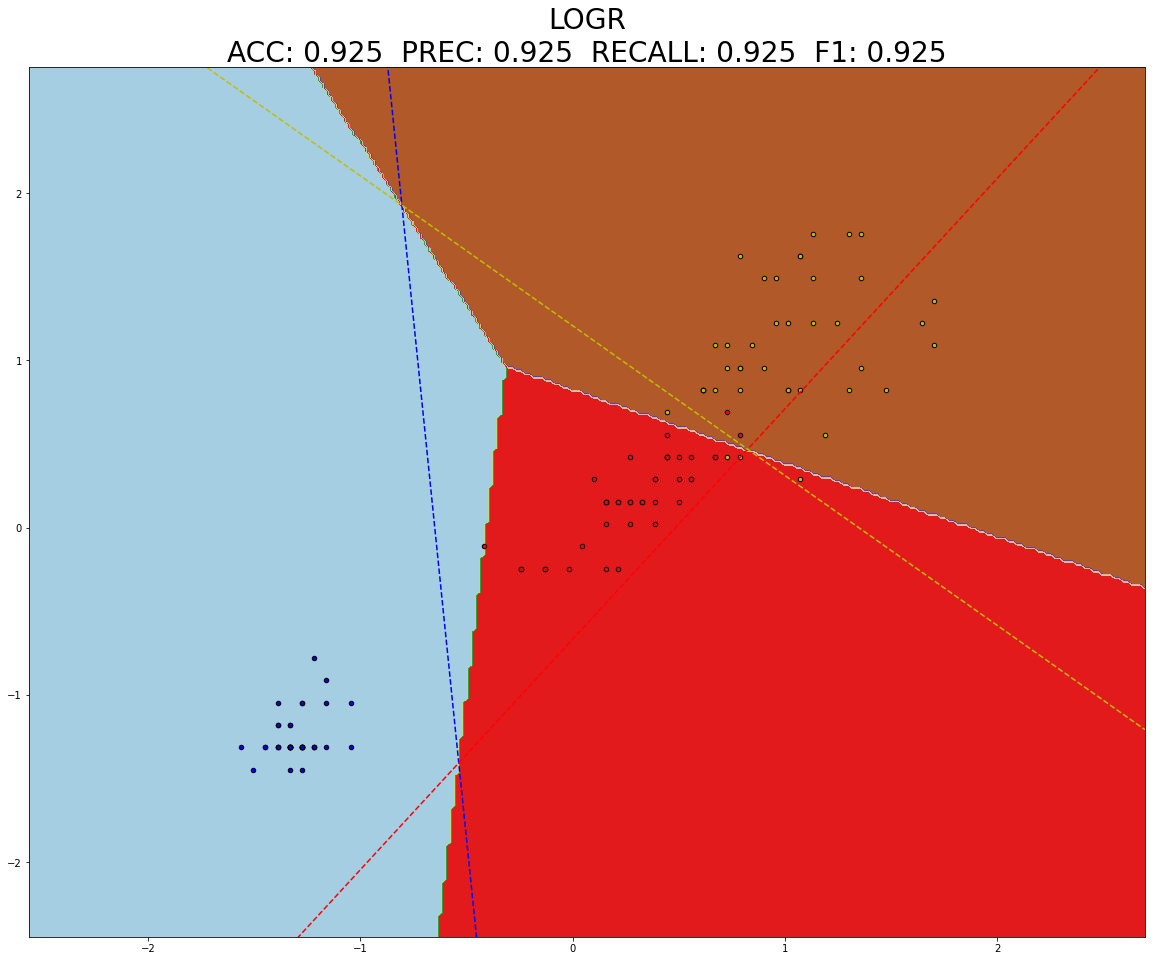

In [10]:
# 5.2) Entrenamiento del modelo definitivo
model = algoritmos['LOGR'].fit(X_stdr, y_training)

# Visualización de las fronteras de decisión
mapa_modelo_clasif_2d(X_stdr, y_training, model, results, nombre)

In [ ]:
# ------------- PREDICTION ---------------- #

In [ ]:
# 6) Extracción de las características de test

In [11]:
# 7) Estandarización de las característiacs de test
X_test_stdr = standardizer.transform(X_testing)

In [ ]:
# 8) Selección de los atributos de test 

In [12]:
# 9) Predicción del conjunto de test
y_pred_test = model.predict(X_test_stdr)
print(y_pred_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [13]:
# 10) Evaluación del modelo sobre el conjunto de test
results = evaluacion(y_testing, y_pred_test, metricas)
print(results)
print(metrics.confusion_matrix(y_testing, y_pred_test))

{'ACC': 1.0, 'PREC': 1.0, 'RECALL': 1.0, 'F1': 1.0}
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


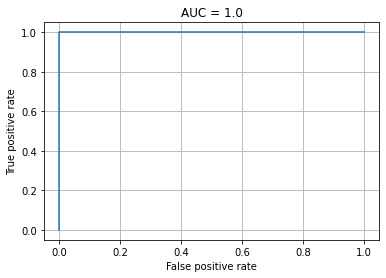

In [14]:
# Ploteamos la curva ROC
y_proba_test = model.predict_proba(X_test_stdr) # "predict_proba" para extraer probabilidades vez de predicciones

y_test_bin = preprocessing.label_binarize(y_testing, classes=[0,1,2]) # Usar "label_binarize" en el caso de problemas multiclase

auc = metrics.roc_auc_score(y_testing, y_proba_test, multi_class='ovr') # Area Under the ROC curve (AUC)

fpr, tpr, th = metrics.roc_curve(y_test_bin[:,1], y_proba_test[:,1])

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC = ' + str(np.round(auc,4)))
plt.grid()
plt.show()